### End sidebar

In [12]:
from fastai.tabular.all import *
from pathlib import Path
from fastdownload import FastDownload
import pandas as pd

In [3]:
base= Path('/home/harpreet/Insync/google_drive_shaannoor/datasets')

In [4]:
d = FastDownload(base=base, archive='archive', data='data')

In [5]:
!kaggle competitions download -c bike-sharing-demand -p {base/'archive'}

100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 1.37MB/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 1.37MB/s]


In [7]:
path = d.extract('bike-sharing-demand.zip')

In [13]:
df = pd.read_csv(path/'train.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [16]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [17]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [27]:
df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [79]:
dls = TabularDataLoaders.from_csv(path/'train.csv', path=path, 
                                  y_names="count",
                                  cat_names = ['season', 'holiday', 'workingday', 'weather'],
                                  cont_names = ['temp', 'atemp', 'humidity', 'windspeed'],
                                  procs = [Categorify, FillMissing, ],
                                  y_range = [0, 1000],
                                  layers = [500, 200, 50],
                                  loss_func = F.mse_loss)

learn = tabular_learner(dls, metrics = [R2Score(), rmse])

SuggestedLRs(valley=0.0691830962896347)

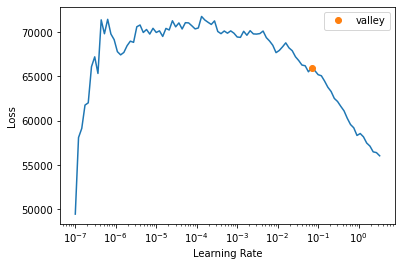

In [80]:
learn.lr_find()

In [81]:
learn.fit_one_cycle(10, 0.05)

epoch,train_loss,valid_loss,r2_score,_rmse,time
0,46996.542969,32391.367188,0.000767,179.976013,00:00
1,24800.982422,22978.929688,0.291129,151.588028,00:00
2,23899.603516,22042.441406,0.320018,148.466965,00:00
3,24439.943359,22175.464844,0.315915,148.914276,00:00
4,22549.472656,22556.789062,0.304151,150.189178,00:00
5,22439.974609,21387.873047,0.340211,146.245926,00:00
6,21897.525391,21527.287109,0.335910,146.721817,00:00
7,21859.853516,21113.058594,0.348688,145.303329,00:00
8,21564.580078,20918.564453,0.354688,144.632523,00:00
9,22013.554688,21001.943359,0.352116,144.920486,00:00
